In [4]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = r"iris.csv"
df = pd.read_csv(path)
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [6]:
X = df.iloc[:, :4]

In [7]:
X

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [8]:
media, sigma = X.mean(axis=0), X.std(axis=0)
X_std = (X - media)/sigma

In [9]:
X_std.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0     -0.897674     1.015602     -1.335752    -1.311052
1     -1.139200    -0.131539     -1.335752    -1.311052
2     -1.380727     0.327318     -1.392399    -1.311052
3     -1.501490     0.097889     -1.279104    -1.311052
4     -1.018437     1.245030     -1.335752    -1.311052

In [10]:
X_std.describe()

Sepal.Length   Sepal.Width  Petal.Length   Petal.Width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -5.210647e-16 -7.579123e-16 -2.842171e-16 -3.789561e-16
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -1.863780e+00 -2.425820e+00 -1.562342e+00 -1.442245e+00
25%   -8.976739e-01 -5.903951e-01 -1.222456e+00 -1.179859e+00
50%   -5.233076e-02 -1.315388e-01  3.353541e-01  1.320673e-01
75%    6.722490e-01  5.567457e-01  7.602115e-01  7.880307e-01
max    2.483699e+00  3.080455e+00  1.779869e+00  1.706379e+00

In [11]:
cov_matrix = (X_std - X_std.mean(axis=0)).T.dot((X_std - X_std.mean(axis=0)))/(X_std.shape[0]-1)
cov_matrix

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000

In [12]:
np.cov(X_std.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [13]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.91849782 0.91403047 0.14675688 0.02071484]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [14]:
eig_vals, eig_vectors = np.linalg.eig(np.cov(X_std.T))
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.91849782 0.91403047 0.14675688 0.02071484]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [15]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]
eigen_pairs

[(np.float64(2.918497816531995),
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (np.float64(0.9140304714680706),
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (np.float64(0.14675687557131528),
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (np.float64(0.02071483642861937),
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [16]:
# Ordenamos de mayor a menor
eigen_pairs.sort(reverse=True)

# Calculamos los porcentajes
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [17]:
print('El porcentaje de información que cada valor propio aporta es:')
var_exp

El porcentaje de información que cada valor propio aporta es:


[np.float64(72.96244541329987),
 np.float64(22.850761786701764),
 np.float64(3.668921889282882),
 np.float64(0.5178709107154842)]

In [18]:
print('El porcentaje de información acumulado es:')
cum_var_exp

El porcentaje de información acumulado es:


array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

In [19]:
eigen_pairs

[(np.float64(2.918497816531995),
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (np.float64(0.9140304714680706),
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (np.float64(0.14675687557131528),
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (np.float64(0.02071483642861937),
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [20]:
eigen_pairs[0][1], eigen_pairs[1][1]

(array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]),
 array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))

In [21]:
T_matrix = np.stack((eigen_pairs[0][1], eigen_pairs[1][1]), axis=1)
T_matrix

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [22]:
T_matrix.shape

(4, 2)

In [23]:
espacio_proyectado = []

for idx in range(len(X_std)):
    vec = X_std.iloc[idx, :] # vector en R4
    Tvec = T_matrix.T.dot(vec) # proyección del espacio de 4D a 2D
    espacio_proyectado.append(Tvec)

In [24]:
espacio_proyectado_np = np.array(espacio_proyectado)

In [25]:
espacio_proyectado_np.shape

(150, 2)

In [26]:
df_proyectado = pd.DataFrame({'CP1': espacio_proyectado_np[:, 0], 
                              'CP2': espacio_proyectado_np[:, 1], 
                              'Species': df['Species']})

<Axes: xlabel='CP1', ylabel='CP2'>

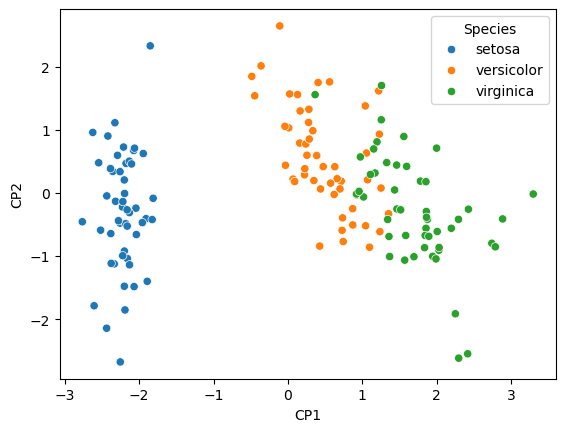

In [27]:
sns.scatterplot(data=df_proyectado, x='CP1', y='CP2', hue='Species')

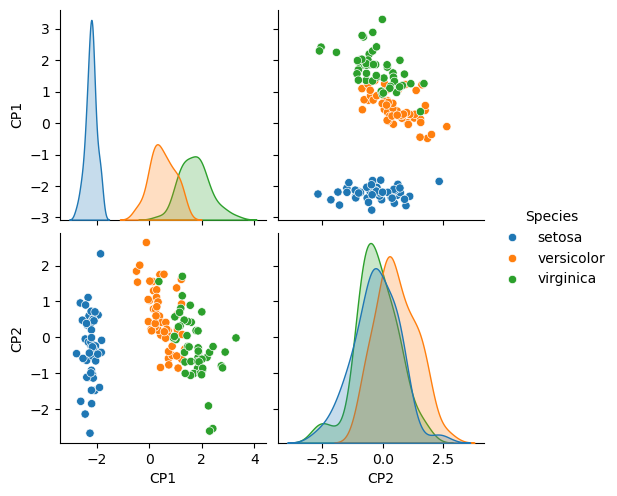

In [28]:
sns.pairplot(df_proyectado, hue="Species")

In [29]:
eigen_pairs

[(np.float64(2.918497816531995),
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (np.float64(0.9140304714680706),
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (np.float64(0.14675687557131528),
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (np.float64(0.02071483642861937),
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [30]:
eigen_pairs[0][1], eigen_pairs[1][1]

(array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]),
 array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))

In [31]:
T_matrix = np.stack((eigen_pairs[0][1], eigen_pairs[1][1]), axis=1)
T_matrix

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [32]:
T_matrix.shape

(4, 2)

In [33]:
# Aquí calculamos los vectores proyectados sin usar for
Y = X_std.dot(T_matrix)
Y

0         1
0   -2.257141 -0.478424
1   -2.074013  0.671883
2   -2.356335  0.340766
3   -2.291707  0.595400
4   -2.381863 -0.644676
..        ...       ...
145  1.864258 -0.385674
146  1.559356  0.893693
147  1.516091 -0.268171
148  1.368204 -1.007878
149  0.957448  0.024250

[150 rows x 2 columns]

# Brain Tumor

In [34]:
path = r"Brain Tumor.csv"
BT_DF = pd.read_csv(path)
BT_DF


Image  Class       Mean     Variance  Standard Deviation   Entropy  \
0        Image1      0   6.535339   619.587845           24.891522  0.109059   
1        Image2      0   8.749969   805.957634           28.389393  0.266538   
2        Image3      1   7.341095  1143.808219           33.820234  0.001467   
3        Image4      1   5.958145   959.711985           30.979219  0.001477   
4        Image5      0   7.315231   729.540579           27.010009  0.146761   
...         ...    ...        ...          ...                 ...       ...   
3757  Image3758      0  21.234512  1208.850174           34.768523  0.063774   
3758  Image3759      0  20.435349  1227.151440           35.030721  0.066763   
3759  Image3760      0  18.011520  1151.582765           33.934978  0.068396   
3760  Image3761      0  13.330429   945.732779           30.752769  0.087872   
3761  Image3762      0   6.110138   480.884025           21.929068  0.118171   

      Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0     4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1     3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2     5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3     5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4     4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   
...        ...        ...         ...       ...       ...          ...   
3757  2.082079   4.647310  158.437600  0.220666  0.048693     0.487131   
3758  2.144625   4.882034  161.158675  0.225931  0.051045     0.502712   
3759  2.308349   5.579498  167.130118  0.228930  0.052409     0.492269   
3760  2.732822   7.757570  223.812932  0.261527  0.068397     0.480064   
3761  4.110669  17.538826  239.251388  0.306224  0.093773     0.494333   

      Dissimilarity  Correlation     Coarseness  
0          4.473346     0.981939  7.458341e-155  
1          3.220072     0.988834  7.458341e-155  
2          5.981800     0.978014  7.458341e-155  
3          7.700919     0.964189  7.458341e-155  
4          6.834689     0.972789  7.458341e-155  
...             ...          ...            ...  
3757       5.211739     0.950972  7.458341e-155  
3758       5.083126     0.952749  7.458341e-155  
3759       5.103700     0.952181  7.458341e-155  
3760       6.439784     0.940898  7.458341e-155  
3761       6.787329     0.938731  7.458341e-155  

[3762 rows x 15 columns]

In [35]:
BT_DF_OG =  pd.read_csv(path)

In [36]:
BT_DF = BT_DF.drop(['Image', 'Class'], axis=1)
BT_DF

Mean     Variance  Standard Deviation   Entropy  Skewness  \
0      6.535339   619.587845           24.891522  0.109059  4.276477   
1      8.749969   805.957634           28.389393  0.266538  3.718116   
2      7.341095  1143.808219           33.820234  0.001467  5.061750   
3      5.958145   959.711985           30.979219  0.001477  5.677977   
4      7.315231   729.540579           27.010009  0.146761  4.283221   
...         ...          ...                 ...       ...       ...   
3757  21.234512  1208.850174           34.768523  0.063774  2.082079   
3758  20.435349  1227.151440           35.030721  0.066763  2.144625   
3759  18.011520  1151.582765           33.934978  0.068396  2.308349   
3760  13.330429   945.732779           30.752769  0.087872  2.732822   
3761   6.110138   480.884025           21.929068  0.118171  4.110669   

       Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0     18.900575   98.613971  0.293314  0.086033     0.530941       4.473346   
1     14.464618   63.858816  0.475051  0.225674     0.651352       3.220072   
2     26.479563   81.867206  0.031917  0.001019     0.268275       5.981800   
3     33.428845  151.229741  0.032024  0.001026     0.243851       7.700919   
4     19.079108  174.988756  0.343849  0.118232     0.501140       6.834689   
...         ...         ...       ...       ...          ...            ...   
3757   4.647310  158.437600  0.220666  0.048693     0.487131       5.211739   
3758   4.882034  161.158675  0.225931  0.051045     0.502712       5.083126   
3759   5.579498  167.130118  0.228930  0.052409     0.492269       5.103700   
3760   7.757570  223.812932  0.261527  0.068397     0.480064       6.439784   
3761  17.538826  239.251388  0.306224  0.093773     0.494333       6.787329   

      Correlation     Coarseness  
0        0.981939  7.458341e-155  
1        0.988834  7.458341e-155  
2        0.978014  7.458341e-155  
3        0.964189  7.458341e-155  
4        0.972789  7.458341e-155  
...           ...            ...  
3757     0.950972  7.458341e-155  
3758     0.952749  7.458341e-155  
3759     0.952181  7.458341e-155  
3760     0.940898  7.458341e-155  
3761     0.938731  7.458341e-155  

[3762 rows x 13 columns]

In [37]:

BT_DF = BT_DF.drop(['Coarseness'], axis=1)
BT_DF

Mean     Variance  Standard Deviation   Entropy  Skewness  \
0      6.535339   619.587845           24.891522  0.109059  4.276477   
1      8.749969   805.957634           28.389393  0.266538  3.718116   
2      7.341095  1143.808219           33.820234  0.001467  5.061750   
3      5.958145   959.711985           30.979219  0.001477  5.677977   
4      7.315231   729.540579           27.010009  0.146761  4.283221   
...         ...          ...                 ...       ...       ...   
3757  21.234512  1208.850174           34.768523  0.063774  2.082079   
3758  20.435349  1227.151440           35.030721  0.066763  2.144625   
3759  18.011520  1151.582765           33.934978  0.068396  2.308349   
3760  13.330429   945.732779           30.752769  0.087872  2.732822   
3761   6.110138   480.884025           21.929068  0.118171  4.110669   

       Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0     18.900575   98.613971  0.293314  0.086033     0.530941       4.473346   
1     14.464618   63.858816  0.475051  0.225674     0.651352       3.220072   
2     26.479563   81.867206  0.031917  0.001019     0.268275       5.981800   
3     33.428845  151.229741  0.032024  0.001026     0.243851       7.700919   
4     19.079108  174.988756  0.343849  0.118232     0.501140       6.834689   
...         ...         ...       ...       ...          ...            ...   
3757   4.647310  158.437600  0.220666  0.048693     0.487131       5.211739   
3758   4.882034  161.158675  0.225931  0.051045     0.502712       5.083126   
3759   5.579498  167.130118  0.228930  0.052409     0.492269       5.103700   
3760   7.757570  223.812932  0.261527  0.068397     0.480064       6.439784   
3761  17.538826  239.251388  0.306224  0.093773     0.494333       6.787329   

      Correlation  
0        0.981939  
1        0.988834  
2        0.978014  
3        0.964189  
4        0.972789  
...           ...  
3757     0.950972  
3758     0.952749  
3759     0.952181  
3760     0.940898  
3761     0.938731  

[3762 rows x 12 columns]

In [38]:
BT_DF_media, BT_DF_sigma = BT_DF.mean(axis=0), BT_DF.std(axis=0)
BT_DF_normalized = (BT_DF - BT_DF_media)/BT_DF_sigma

In [39]:
BT_DF_normalized.head()

Mean  Variance  Standard Deviation   Entropy  Skewness  Kurtosis  \
0 -0.515632 -0.195764           -0.033139  0.504583  0.067846 -0.097254   
1 -0.129001  0.202916            0.365545  2.745685 -0.150184 -0.175857   
2 -0.374963  0.925642            0.984549 -1.026571  0.374481  0.037043   
3 -0.616399  0.531826            0.660732 -1.026424  0.615106  0.160181   
4 -0.379478  0.039446            0.208324  1.041118  0.070480 -0.094090   

   Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  
0 -0.268015  0.685027  0.470011     0.404046      -0.121692     1.000580  
1 -0.585414  2.090010  2.865199     1.345278      -0.799075     1.264209  
2 -0.420954 -1.335804 -0.988209    -1.649172       0.693612     0.850523  
3  0.212497 -1.334976 -0.988091    -1.840090       1.622779     0.321998  
4  0.429475  1.075706  1.022306     0.171092       1.154590     0.650767

In [40]:
BT_DF_normalized_cov_matrix = (BT_DF_normalized - BT_DF_normalized.mean(axis=0)).T.dot((BT_DF_normalized - BT_DF_normalized.mean(axis=0)))/(BT_DF_normalized.shape[0]-1)
BT_DF_normalized_cov_matrix

Mean  Variance  Standard Deviation   Entropy  \
Mean                1.000000  0.783027            0.790984 -0.099729   
Variance            0.783027  1.000000            0.975699 -0.344432   
Standard Deviation  0.790984  0.975699            1.000000 -0.345127   
Entropy            -0.099729 -0.344432           -0.345127  1.000000   
Skewness           -0.601593 -0.347399           -0.425428 -0.222222   
Kurtosis           -0.358163 -0.248312           -0.329798 -0.140125   
Contrast           -0.050974  0.135494            0.117981 -0.140769   
Energy             -0.014863 -0.335470           -0.331103  0.971260   
ASM                -0.109393 -0.341061           -0.342530  0.999213   
Homogeneity         0.095556 -0.290527           -0.288801  0.852019   
Dissimilarity      -0.113864  0.235487            0.224773 -0.502363   
Correlation         0.293693  0.288037            0.354161  0.122080   

                    Skewness  Kurtosis  Contrast    Energy       ASM  \
Mean               -0.601593 -0.358163 -0.050974 -0.014863 -0.109393   
Variance           -0.347399 -0.248312  0.135494 -0.335470 -0.341061   
Standard Deviation -0.425428 -0.329798  0.117981 -0.331103 -0.342530   
Entropy            -0.222222 -0.140125 -0.140769  0.971260  0.999213   
Skewness            1.000000  0.899713  0.349856 -0.295413 -0.209289   
Kurtosis            0.899713  1.000000  0.296664 -0.172454 -0.133741   
Contrast            0.349856  0.296664  1.000000 -0.130708 -0.139276   
Energy             -0.295413 -0.172454 -0.130708  1.000000  0.961628   
ASM                -0.209289 -0.133741 -0.139276  0.961628  1.000000   
Homogeneity        -0.470054 -0.307314 -0.270119  0.915988  0.837139   
Dissimilarity       0.511931  0.375939  0.761497 -0.545774 -0.491813   
Correlation        -0.570919 -0.589211 -0.427443  0.123680  0.121054   

                    Homogeneity  Dissimilarity  Correlation  
Mean                   0.095556      -0.113864     0.293693  
Variance              -0.290527       0.235487     0.288037  
Standard Deviation    -0.288801       0.224773     0.354161  
Entropy                0.852019      -0.502363     0.122080  
Skewness              -0.470054       0.511931    -0.570919  
Kurtosis              -0.307314       0.375939    -0.589211  
Contrast              -0.270119       0.761497    -0.427443  
Energy                 0.915988      -0.545774     0.123680  
ASM                    0.837139      -0.491813     0.121054  
Homogeneity            1.000000      -0.746675     0.198639  
Dissimilarity         -0.746675       1.000000    -0.393013  
Correlation            0.198639      -0.393013     1.000000

In [41]:
BT_DF_normalized_eig_vals, BT_DF_normalized_eig_vectors = np.linalg.eig(BT_DF_normalized_cov_matrix)
print("Valores propios \n%s"%BT_DF_normalized_eig_vals)
print("Vectores propios \n%s"%BT_DF_normalized_eig_vectors)

Valores propios 
[4.90580127e+00 3.75589772e+00 1.54491165e+00 7.51781548e-01
 5.74136703e-01 2.40065025e-01 1.29191528e-01 4.01132334e-02
 3.06366755e-02 6.44700117e-05 1.07013717e-02 1.66988010e-02]
Vectores propios 
[[ 1.36943174e-03  4.29053945e-01  2.54168149e-01 -3.80815552e-01
   2.39604973e-01  2.66155771e-01 -5.89278264e-01  3.36859675e-01
  -9.60416311e-02 -5.54591452e-03  8.90601712e-02  1.13880660e-02]
 [-1.60192825e-01  4.20574153e-01  2.74990715e-01 -2.25068392e-01
  -1.62014901e-01 -2.14102548e-01  4.04552866e-01  6.15755860e-03
  -3.33629783e-01  6.81121505e-03 -4.46201243e-01  3.53467858e-01]
 [-1.49575575e-01  4.44042821e-01  2.46728233e-01 -1.28698555e-01
  -1.61386185e-01 -1.99132152e-01  2.50215051e-01 -2.05643795e-01
   3.07294499e-01 -7.55869290e-03  4.62750284e-01 -4.73068766e-01]
 [ 4.02581652e-01 -1.09882624e-01  2.78138676e-01 -4.32420047e-03
  -1.89074137e-01 -2.64303269e-01 -7.02753849e-02  1.55125392e-01
   1.50153800e-01 -7.52467419e-01  5.37319585e-02  1

In [42]:
BT_DF_normalized_eigen_pairs = [(np.abs(BT_DF_normalized_eig_vals[i]), BT_DF_normalized_eig_vectors[:,i]) for i in range(len(BT_DF_normalized_eig_vals))]
BT_DF_normalized_eigen_pairs

[(np.float64(4.905801274426106),
  array([ 0.00136943, -0.16019282, -0.14957557,  0.40258165, -0.226439  ,
         -0.18265944, -0.20348598,  0.41184785,  0.39858351,  0.42547398,
         -0.36155618,  0.15364722])),
 (np.float64(3.7558977227864068),
  array([ 0.42905395,  0.42057415,  0.44404282, -0.10988262, -0.40062892,
         -0.35364128, -0.11528353, -0.08462646, -0.11242046, -0.00631365,
         -0.08739418,  0.32163379])),
 (np.float64(1.5449116480893115),
  array([ 0.25416815,  0.27499071,  0.24672823,  0.27813868,  0.05099936,
          0.14853806,  0.59105637,  0.28354991,  0.27854662,  0.13711388,
          0.33681352, -0.23937056])),
 (np.float64(0.7517815478829776),
  array([-0.38081555, -0.22506839, -0.12869856, -0.0043242 , -0.26350687,
         -0.59810815,  0.42639154, -0.02236709, -0.00318504, -0.08415574,
          0.34374611,  0.23023626])),
 (np.float64(0.5741367030852033),
  array([ 0.23960497, -0.1620149 , -0.16138618, -0.18907414, -0.35023323,
         -0.2

In [43]:
# Ordenamos de mayor a menor
BT_DF_normalized_eigen_pairs.sort(reverse=True)

# Calculamos los porcentajes
BT_DF_normalized_total_sum = sum(BT_DF_normalized_eig_vals)
BT_DF_normalized_var_exp = [(i/BT_DF_normalized_total_sum)*100 for i in sorted(BT_DF_normalized_eig_vals, reverse=True)]
BT_DF_normalized_cum_var_exp = np.cumsum(BT_DF_normalized_var_exp)

In [44]:
print('El porcentaje de información que cada valor propio aporta es:')
BT_DF_normalized_var_exp

El porcentaje de información que cada valor propio aporta es:


[np.float64(40.8816772868842),
 np.float64(31.29914768988671),
 np.float64(12.87426373407759),
 np.float64(6.264846232358144),
 np.float64(4.784472525710025),
 np.float64(2.000541870970155),
 np.float64(1.076596063587524),
 np.float64(0.33427694535050706),
 np.float64(0.25530562880843455),
 np.float64(0.13915667474024598),
 np.float64(0.08917809752889194),
 np.float64(0.0005372500975873375)]

In [45]:
print('El porcentaje de información acumulado es:')
BT_DF_normalized_cum_var_exp

El porcentaje de información acumulado es:


array([ 40.88167729,  72.18082498,  85.05508871,  91.31993494,
        96.10440747,  98.10494934,  99.1815454 ,  99.51582235,
        99.77112798,  99.91028465,  99.99946275, 100.        ])

In [46]:
BT_DF_normalized_eigen_pairs[0][1], BT_DF_normalized_eigen_pairs[1][1]

(array([ 0.00136943, -0.16019282, -0.14957557,  0.40258165, -0.226439  ,
        -0.18265944, -0.20348598,  0.41184785,  0.39858351,  0.42547398,
        -0.36155618,  0.15364722]),
 array([ 0.42905395,  0.42057415,  0.44404282, -0.10988262, -0.40062892,
        -0.35364128, -0.11528353, -0.08462646, -0.11242046, -0.00631365,
        -0.08739418,  0.32163379]))

In [47]:
BT_DF_normalized_T_matrix = np.stack((BT_DF_normalized_eigen_pairs[0][1], BT_DF_normalized_eigen_pairs[1][1],BT_DF_normalized_eigen_pairs[2][1],BT_DF_normalized_eigen_pairs[3][1]), axis=1)
BT_DF_normalized_T_matrix

array([[ 0.00136943,  0.42905395,  0.25416815, -0.38081555],
       [-0.16019282,  0.42057415,  0.27499071, -0.22506839],
       [-0.14957557,  0.44404282,  0.24672823, -0.12869856],
       [ 0.40258165, -0.10988262,  0.27813868, -0.0043242 ],
       [-0.226439  , -0.40062892,  0.05099936, -0.26350687],
       [-0.18265944, -0.35364128,  0.14853806, -0.59810815],
       [-0.20348598, -0.11528353,  0.59105637,  0.42639154],
       [ 0.41184785, -0.08462646,  0.28354991, -0.02236709],
       [ 0.39858351, -0.11242046,  0.27854662, -0.00318504],
       [ 0.42547398, -0.00631365,  0.13711388, -0.08415574],
       [-0.36155618, -0.08739418,  0.33681352,  0.34374611],
       [ 0.15364722,  0.32163379, -0.23937056,  0.23023626]])

In [48]:
BT_DF_normalized_T_matrix.shape

(12, 4)

In [49]:
#Proyección 1

In [50]:
BT_DF_normalized_espacio_proyectado = []

for idx in range(len(BT_DF_normalized)):
    BT_DF_normalized_vec = BT_DF_normalized.iloc[idx, :] 
    BT_DF_normalized_Tvec = BT_DF_normalized_T_matrix.T.dot(BT_DF_normalized_vec)
    BT_DF_normalized_espacio_proyectado.append(BT_DF_normalized_Tvec)

In [51]:
BT_DF_normalized_espacio_proyectado

[array([ 1.13479661, -0.11652379, -0.12205767,  0.30623178]),
 array([ 4.2615767 ,  0.04943052,  1.50050634, -0.31302035]),
 array([-2.48105344,  1.11129806, -0.95770617,  0.11792348]),
 array([-3.07367629,  0.23522774, -0.38869516,  0.68697709]),
 array([ 0.90080724, -0.31123316,  1.34517504,  0.83015012]),
 array([ 3.07744544, -0.44156171,  1.12606568,  0.20038436]),
 array([1.25709732, 0.93240325, 0.86298747, 0.00919169]),
 array([ 1.05185395,  1.7030886 ,  0.68219768, -0.43751646]),
 array([ 0.83747761,  2.26091391,  0.77454514, -0.77416303]),
 array([-1.76947429,  1.20057064, -1.05643654, -0.22818821]),
 array([-1.6868125 ,  1.45476391, -1.03368598, -0.25370962]),
 array([-1.96335589,  1.47868634, -0.11478739, -0.01442292]),
 array([-0.920632  ,  0.74942229, -0.85493565, -0.26217791]),
 array([ 1.01446135, -0.66733458, -0.28205041,  0.14752372]),
 array([ 6.19230643, -1.37328258,  1.69395533, -0.21373329]),
 array([-1.63027587,  1.63379632, -0.94451523, -0.04421358]),
 array([-1.5

In [52]:
len(BT_DF_normalized_espacio_proyectado)

3762

In [53]:
BT_DF_normalized_espacio_proyectado_np = np.array(BT_DF_normalized_espacio_proyectado)

In [54]:
BT_DF_normalized_espacio_proyectado_np.shape

(3762, 4)

In [55]:
BT_DF_normalized_df_proyectado = pd.DataFrame({'CP1': BT_DF_normalized_espacio_proyectado_np[:, 0], 
                              'CP2': BT_DF_normalized_espacio_proyectado_np[:, 1],
                              'CP3': BT_DF_normalized_espacio_proyectado_np[:, 2],
                              'CP4': BT_DF_normalized_espacio_proyectado_np[:, 3],
                              'Class': BT_DF_OG['Class']})

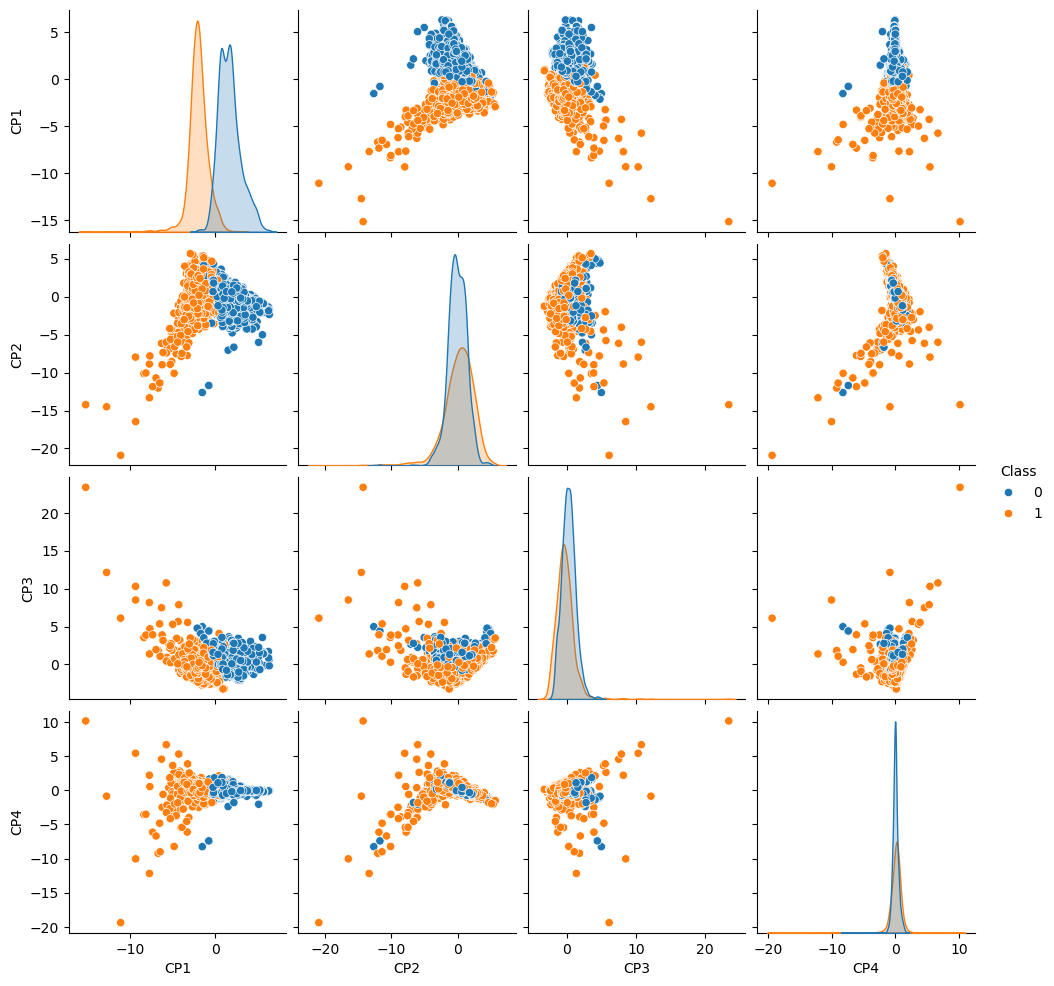

In [56]:
sns.pairplot(BT_DF_normalized_df_proyectado, hue='Class')

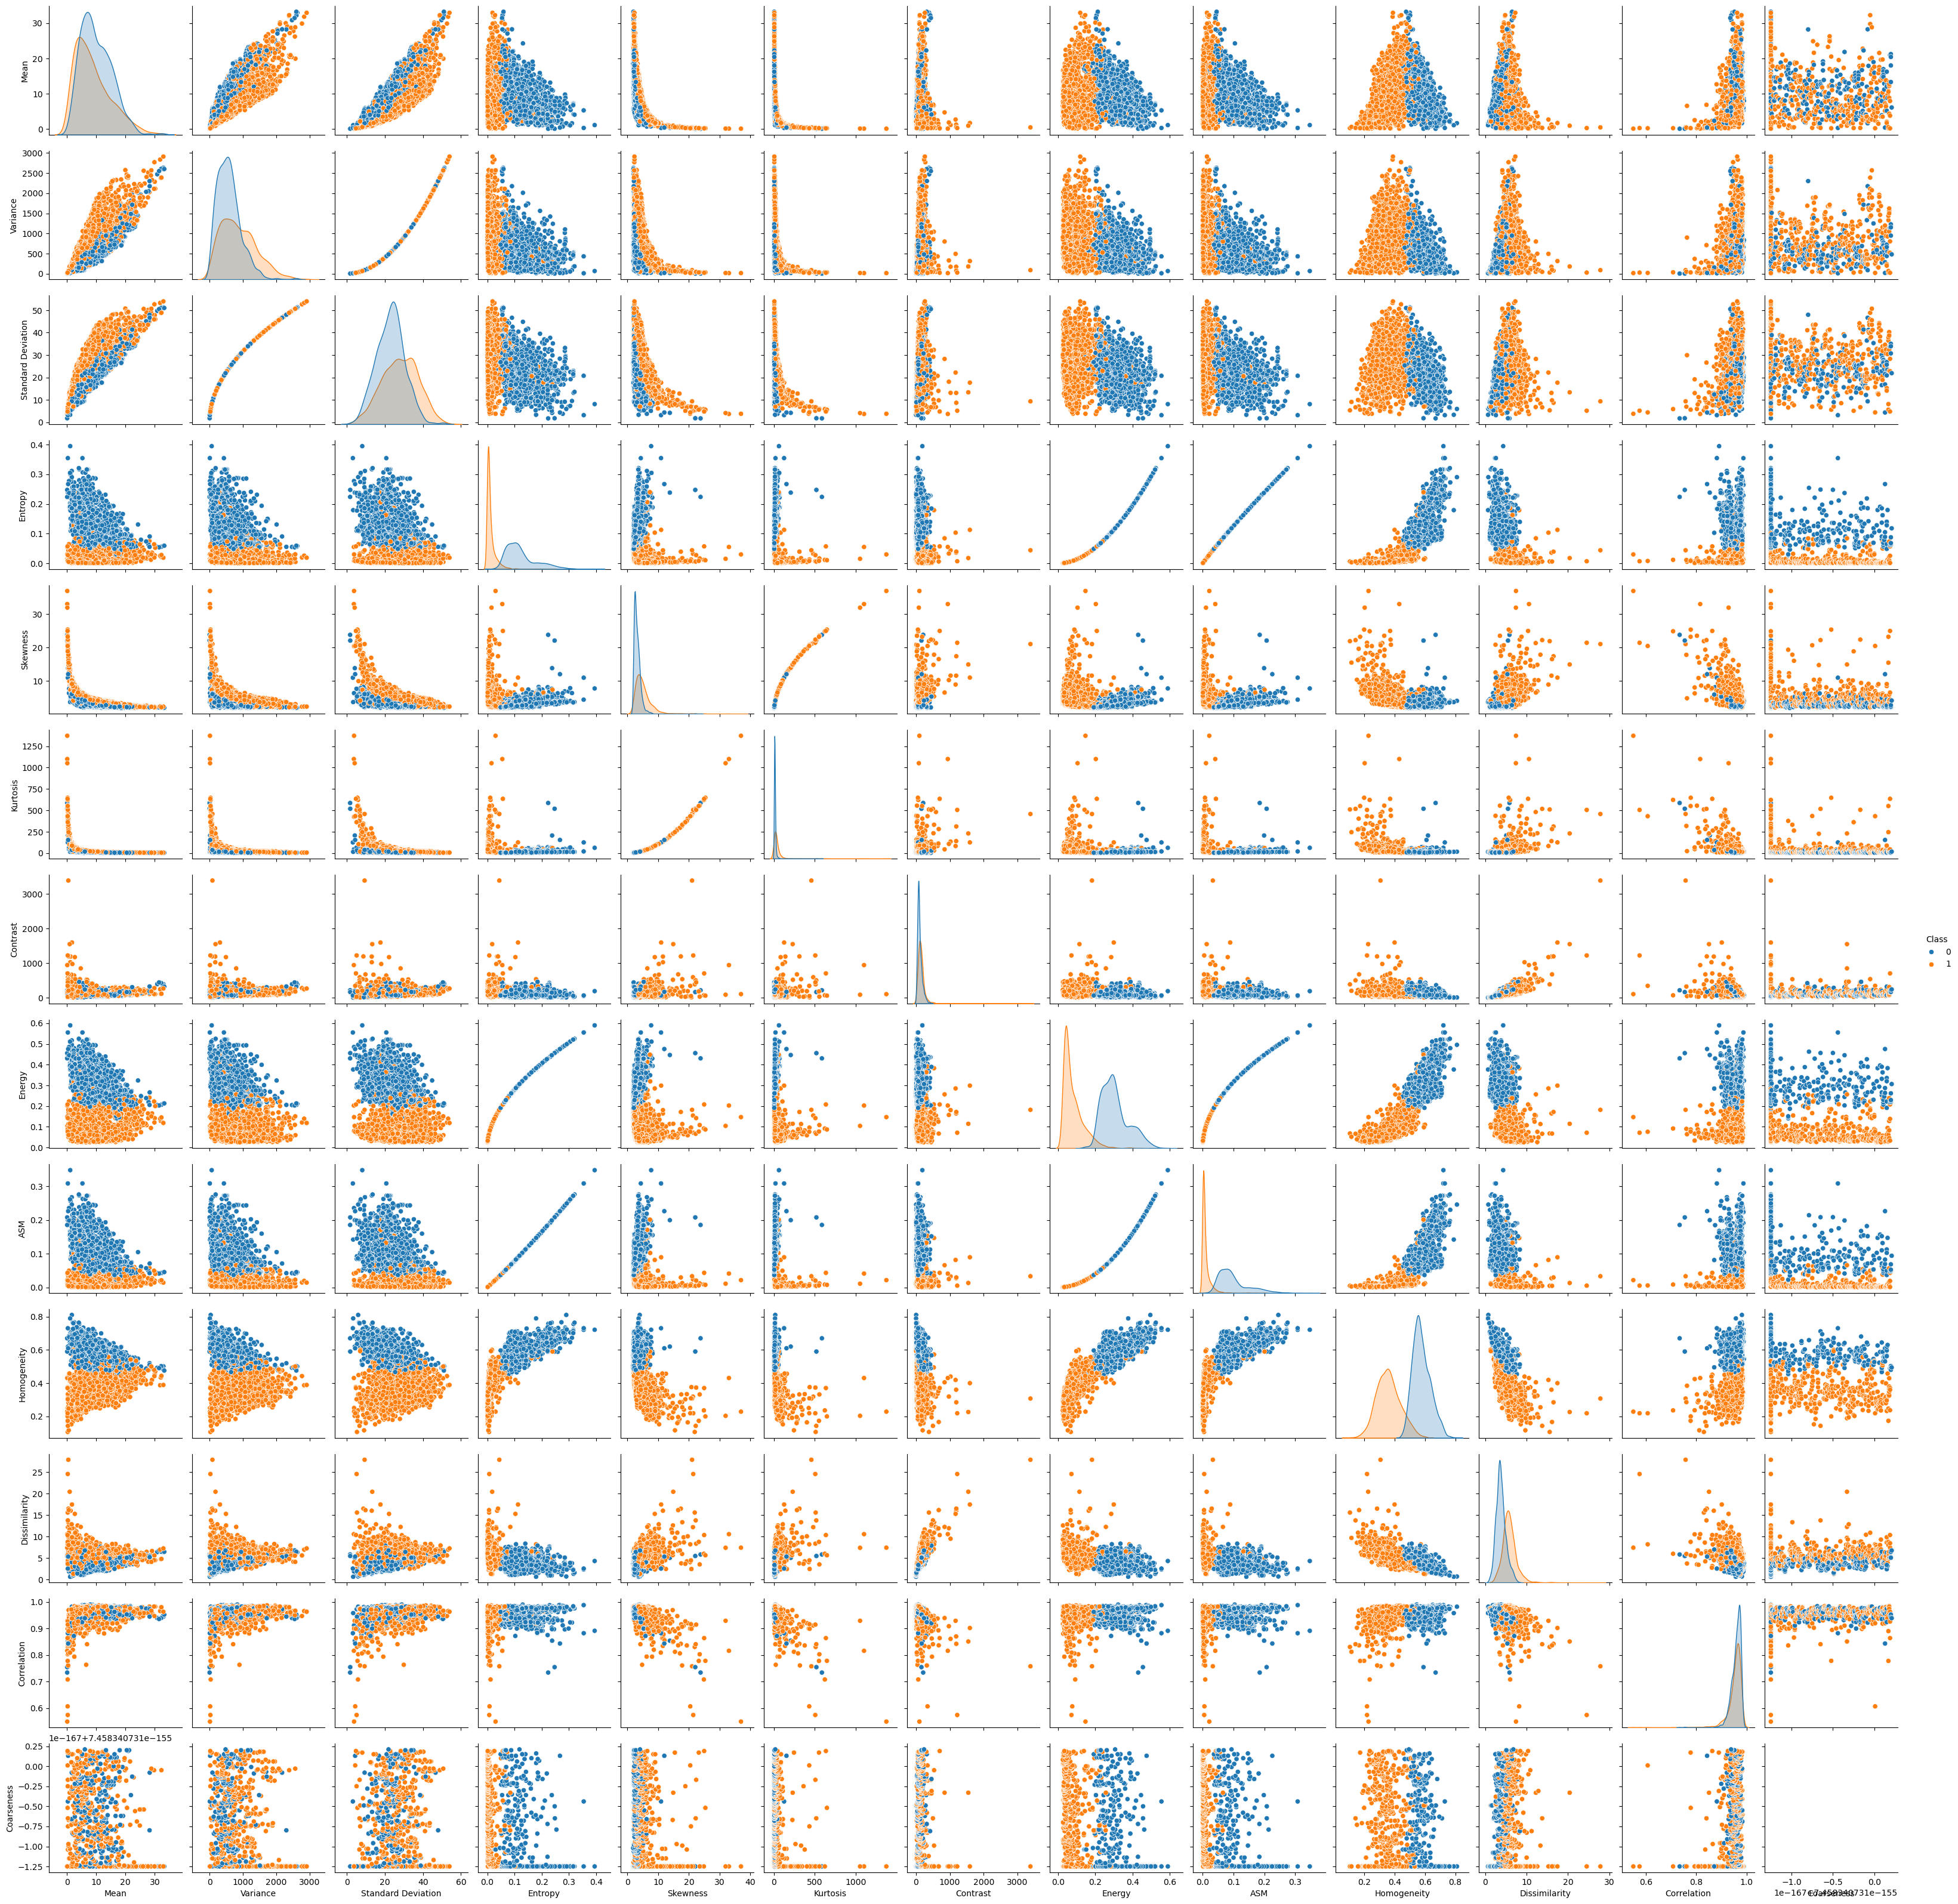

In [57]:
sns.pairplot(BT_DF_OG, hue='Class')

In [59]:
from sklearn.decomposition import PCA

In [63]:
BT_DF__pca = PCA(n_components=4)
BT_DF_data_proyectada = pca.fit_transform(BT_DF_normalized)

In [71]:
DF_BT_FINAL = pd.DataFrame(BT_DF_data_proyectada)
DF_BT_FINAL

0         1         2         3
0     1.134797 -0.116524 -0.122058 -0.306232
1     4.261577  0.049431  1.500506  0.313020
2    -2.481053  1.111298 -0.957706 -0.117923
3    -3.073676  0.235228 -0.388695 -0.686977
4     0.900807 -0.311233  1.345175 -0.830150
...        ...       ...       ...       ...
3757 -0.320959  2.161024  1.250234  0.578980
3758 -0.205878  2.131286  1.261093  0.556558
3759 -0.203571  1.775428  1.132907  0.338944
3760 -0.273109  0.654947  1.593092 -0.421258
3761  0.308918 -1.213108  1.325185 -1.094334

[3762 rows x 4 columns]

In [73]:
DF_BT_FINAL['Class'] = BT_DF_OG['Class'].values
DF_BT_FINAL

0         1         2         3  Class
0     1.134797 -0.116524 -0.122058 -0.306232      0
1     4.261577  0.049431  1.500506  0.313020      0
2    -2.481053  1.111298 -0.957706 -0.117923      1
3    -3.073676  0.235228 -0.388695 -0.686977      1
4     0.900807 -0.311233  1.345175 -0.830150      0
...        ...       ...       ...       ...    ...
3757 -0.320959  2.161024  1.250234  0.578980      0
3758 -0.205878  2.131286  1.261093  0.556558      0
3759 -0.203571  1.775428  1.132907  0.338944      0
3760 -0.273109  0.654947  1.593092 -0.421258      0
3761  0.308918 -1.213108  1.325185 -1.094334      0

[3762 rows x 5 columns]

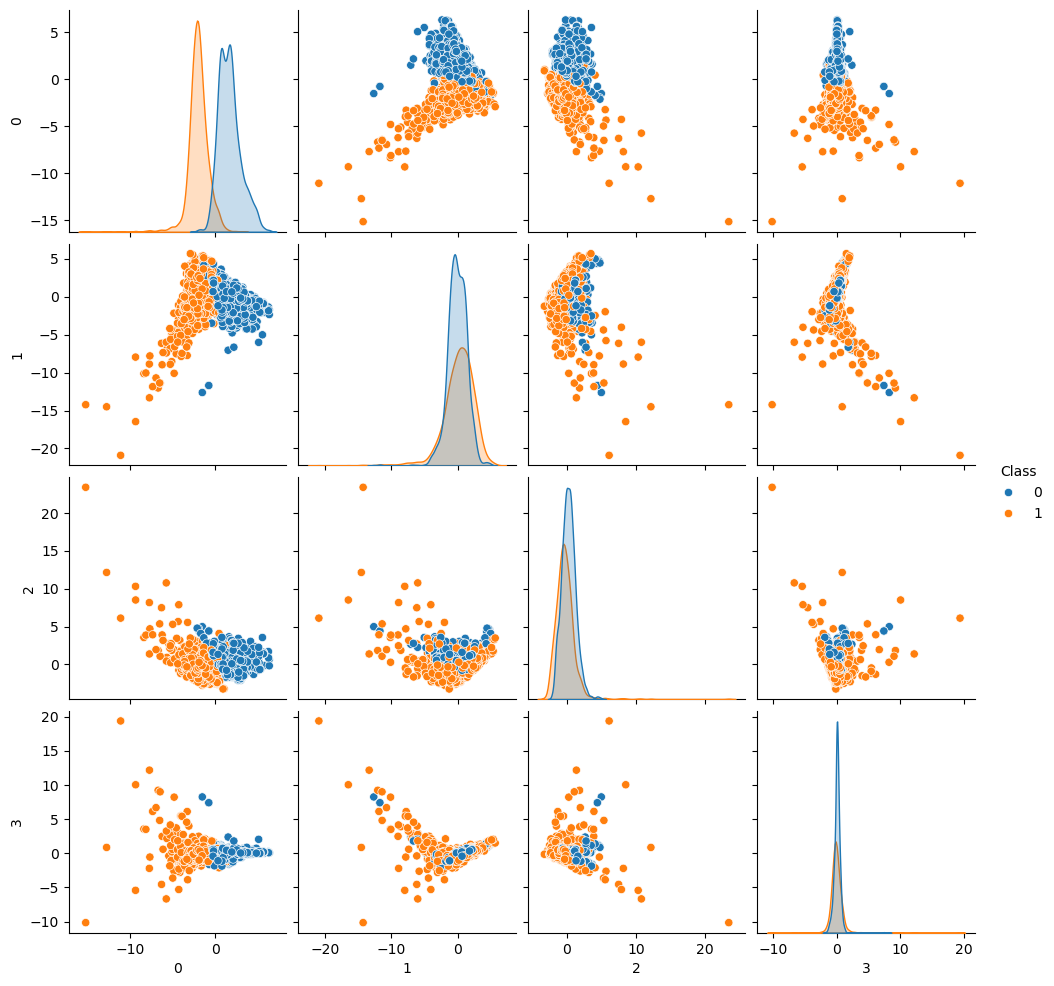

In [74]:
sns.pairplot(DF_BT_FINAL, hue='Class')